In [87]:
# /home/j3nnn1/itba/deepLCourse/20210328_home_BayesDiscreto/5 - Clasific-Naive-Bayes-histograma.ipynb
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D
from BiVariateJoint import get_class_prob

In [88]:

data = pd.read_csv('data/alturas-pesos-mils-train.csv')

In [89]:

test = pd.read_csv('data/alturas-pesos-mils-test.csv')

In [90]:

from BiVariateJoint import BiVariateJoint

In [91]:
data_hombres = data.loc[data['Genero']=='Hombre'][['Peso','Altura']].values
data_mujeres = data.loc[data['Genero']=='Mujer'][['Peso','Altura']].values

# data de peso y altura filtrado por el genero, llena dos vectores donde data_hombres + data_mujeres = 8000 filas
# cada vector tiene dos columnas 0 para el peso y 1 para la altura.
# es la data dado un genero tenga un peso y una altura en especifico.

print("data hombres len " + str(len(data_hombres)) + " data mujeres len: " + str(len(data_mujeres)))

data hombres len 4002 data mujeres len: 3998


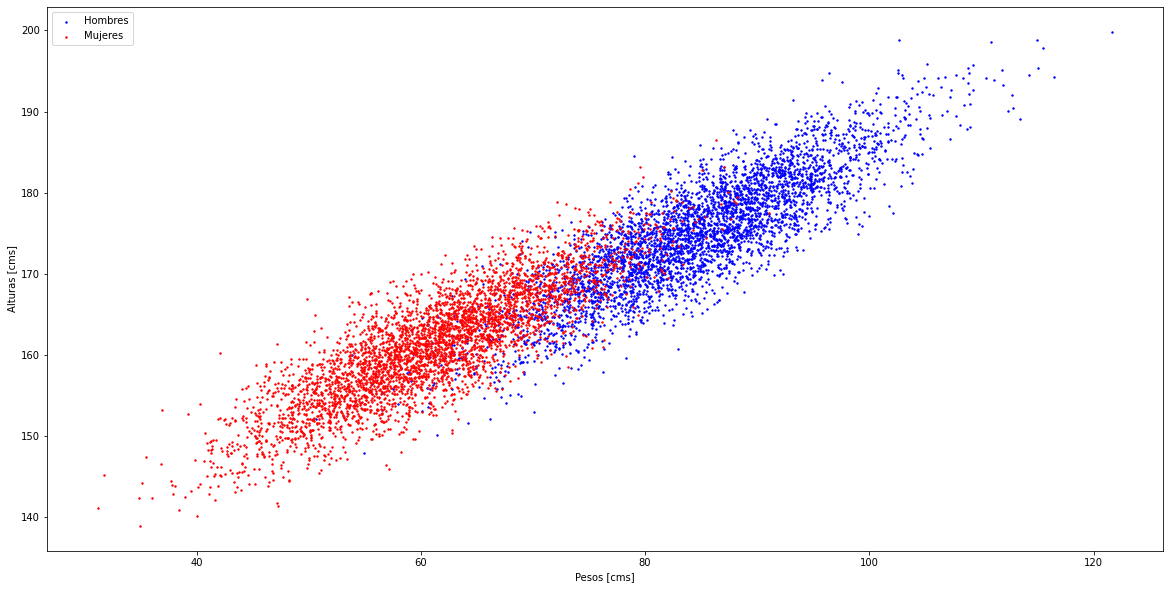

In [92]:
%matplotlib inline
f = plt.figure(figsize=(20,10))
plt.scatter(data_hombres[:,0], data_hombres[:,1], color='b', s=2, label='Hombres')
plt.scatter(data_mujeres[:,0], data_mujeres[:,1], color='r', s=2, label='Mujeres')
plt.xlabel('Pesos [cms]')
plt.ylabel('Alturas [cms]')
plt.legend()
plt.show()

In [93]:
#//2
step = 10
maxs = np.round(data[['Peso','Altura']].values.max(axis = 0))
mins = np.round(data[['Peso','Altura']].values.min(axis = 0))
# para hacer el histograma  con step = 2, data contiene todo (8000 registros)
# al elegir axis 0, le comento que busque el maximo por columna. solo resulta un vector de dos posiciones con el maximo valor por peso y por altura.
# en el caso que sea 1, sera por filas, y generara un vector de 8000 filas con un resultado maximo.
print (len (data[['Peso','Altura']].values.max(axis = 0)))

2


In [94]:
# calculo la probabilidad conjunta generado un counter de  las tuplas con una frecuencia.
# y teniendo en cuenta el step del histograma

joint_hombres = BiVariateJoint(data_hombres,
                               step_X = step,
                               step_Y = step,
                               mins = mins,
                               maxs = maxs
                              )
joint_mujeres = BiVariateJoint(data_mujeres,
                               step_X = step,
                               step_Y = step,
                               mins = mins,
                               maxs = maxs)

In [95]:
def getAxis():
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122, projection='3d')
    ax1.set_aspect('auto')
    ax2.set_aspect('auto')
    ax1.set_xlabel('Pesos [cms]')
    ax1.set_ylabel('Alturas [cms]')
    ax2.set_xlabel('Pesos [kgs]')
    ax2.set_ylabel('Alturas [cms]')
    ax2.set_zlabel('Frecuencia')
    fig.tight_layout()
    return ax1, ax2

In [96]:
#esto es lo adicional que se calcula en caso que se suponga independencia.
# genera DOS vectores de probabilidad
def get_indep_likelihoods(joint_hombres, joint_mujeres):
    marg_pesos_hombres,  marg_alturas_hombres = joint_hombres.get_Marginals()
    marg_pesos_mujeres,  marg_alturas_mujeres = joint_mujeres.get_Marginals()
    marg_pesos_hombres_rep, marg_alturas_hombres_rep = np.meshgrid(marg_pesos_hombres,
                                                                   marg_alturas_hombres)
    marg_pesos_mujeres_rep, marg_alturas_mujeres_rep = np.meshgrid(marg_pesos_mujeres,
                                                                   marg_alturas_mujeres)
    likelihood_indep_class_1 = (marg_pesos_hombres_rep*marg_alturas_hombres_rep).T
    likelihood_indep_class_2 = (marg_pesos_mujeres_rep*marg_alturas_mujeres_rep).T
    return likelihood_indep_class_1, likelihood_indep_class_2

In [97]:

marg_pesos_hombres,  marg_alturas_hombres = joint_hombres.get_Marginals(normalized=False)
marg_pesos_mujeres,  marg_alturas_mujeres = joint_mujeres.get_Marginals(normalized=False)

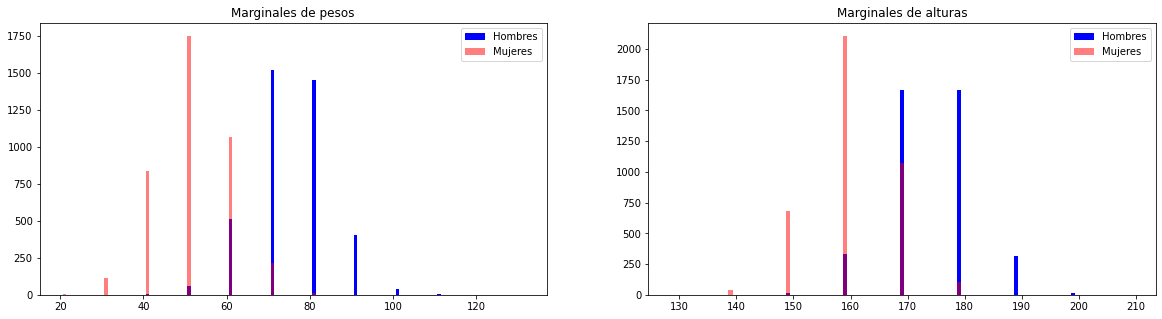

In [98]:
%matplotlib inline
f, ax = plt.subplots(1, 2, figsize=(20,5))
ax[0].bar(joint_hombres.X, marg_pesos_hombres, color='b', label='Hombres')
ax[0].bar(joint_mujeres.X, marg_pesos_mujeres, alpha=0.5, color='r', label='Mujeres')
ax[1].bar(joint_hombres.Y, marg_alturas_hombres, color='b', label='Hombres')
ax[1].bar(joint_mujeres.Y, marg_alturas_mujeres, alpha=0.5, color='r', label='Mujeres')
ax[0].set_title('Marginales de pesos')
ax[1].set_title('Marginales de alturas')
ax[0].legend()
ax[1].legend()
plt.show()

In [99]:

marg_pesos_hombres_rep, marg_alturas_hombres_rep = np.meshgrid(marg_pesos_hombres, marg_alturas_hombres)
marg_pesos_mujeres_rep, marg_alturas_mujeres_rep = np.meshgrid(marg_pesos_mujeres, marg_alturas_mujeres)

In [100]:

likelihood_indep_class_1 = (marg_pesos_hombres_rep*marg_alturas_hombres_rep).T
likelihood_indep_class_2 = (marg_pesos_mujeres_rep*marg_alturas_mujeres_rep).T

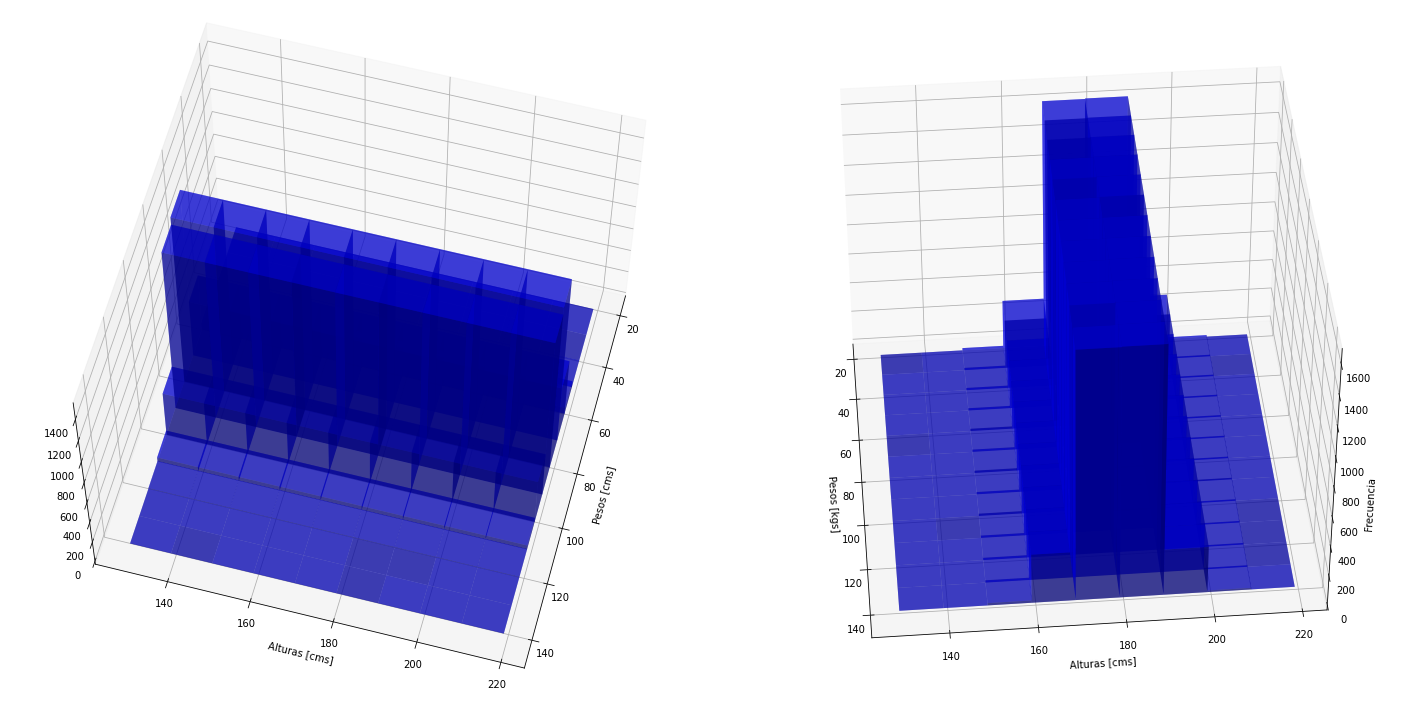

In [101]:

%matplotlib inline
ax1, ax2 = getAxis()
joint_hombres.plot_joint_3d(marg_pesos_hombres_rep.T, ax=ax1, color='b', el=60, az=15)
joint_mujeres.plot_joint_3d(marg_alturas_hombres_rep.T, ax=ax2, color='b', el=40, az=-5)

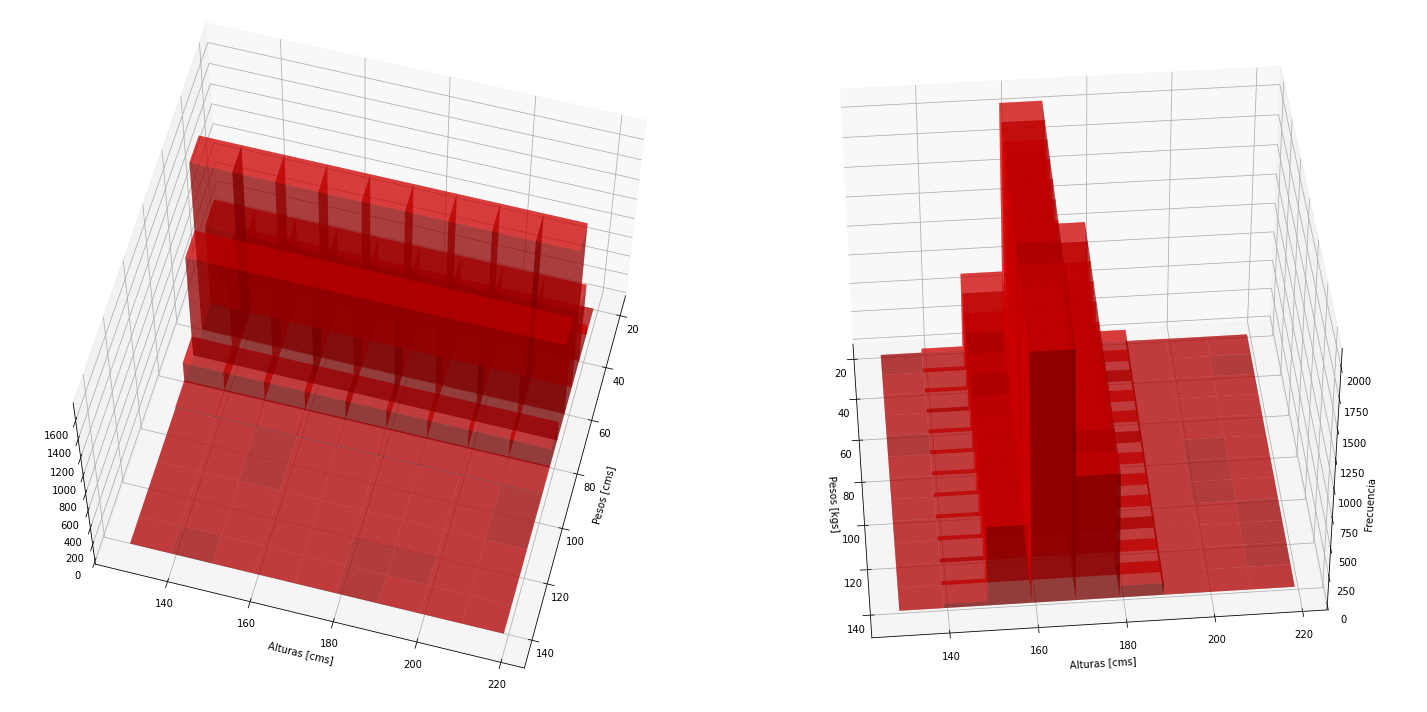

In [102]:

%matplotlib inline
ax1, ax2 = getAxis()
joint_hombres.plot_joint_3d(marg_pesos_mujeres_rep.T, ax=ax1, color='r', el=60, az=15)
joint_mujeres.plot_joint_3d(marg_alturas_mujeres_rep.T, ax=ax2, color='r', el=40, az=-5)

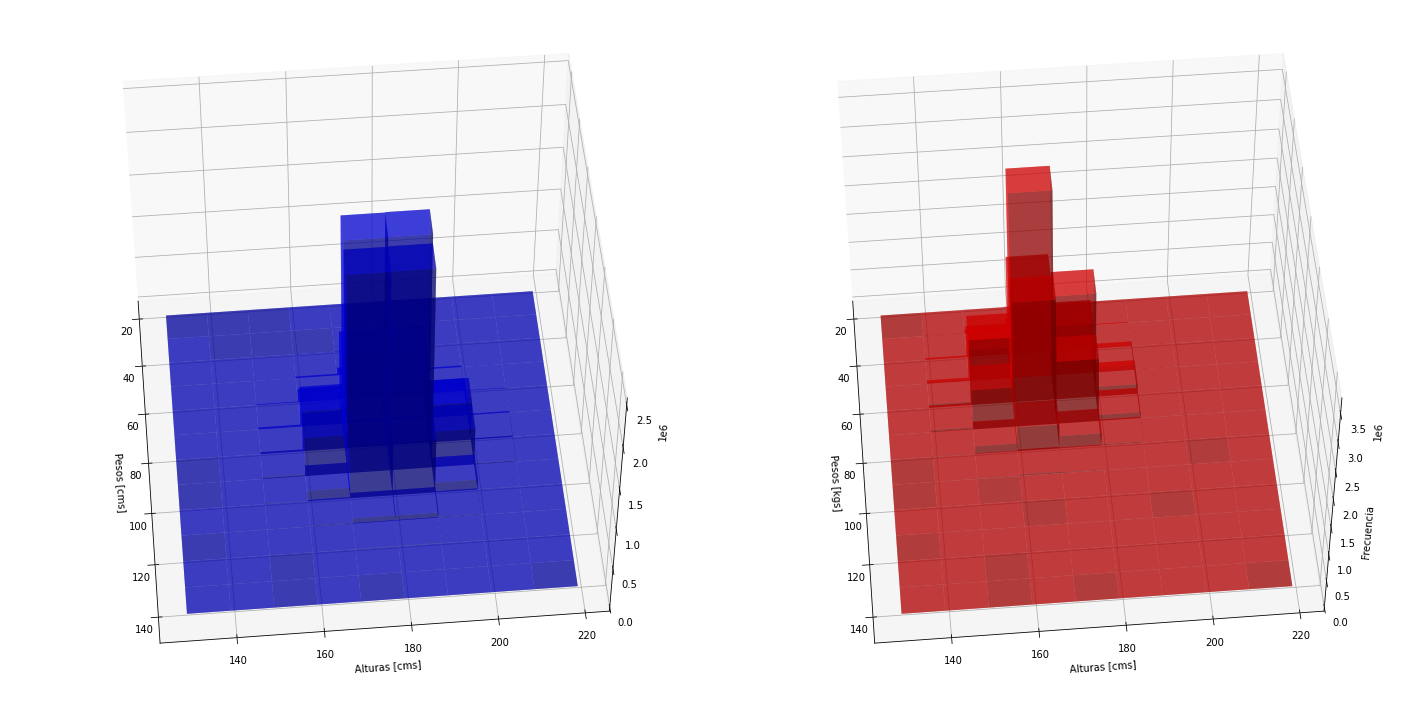

In [103]:
%matplotlib inline
ax1, ax2 = getAxis()
joint_hombres.plot_joint_3d(likelihood_indep_class_1, ax=ax1, color='b')
joint_mujeres.plot_joint_3d(likelihood_indep_class_2, ax=ax2, color='r')

In [104]:

from BiVariateJoint import get_class_prob_naive
p_class_1, p_class_2 = get_class_prob_naive(data['Peso'].values,
                                            data['Altura'].values,
                                            joint_hombres,
                                            joint_mujeres,
                                           likelihood_indep_class_1,
                                           likelihood_indep_class_2)
acc_train_nbayes = ((p_class_1>p_class_2) == (data['Genero'].values == 'Hombre')).sum()/len(data)
print(acc_train_nbayes)

0.845625


In [105]:

p_class_1, p_class_2 = get_class_prob_naive(test['Peso'].values,
                                            test['Altura'].values,
                                            joint_hombres,
                                            joint_mujeres,
                                           likelihood_indep_class_1,
                                           likelihood_indep_class_2
                                           )
acc_cv_nbayes = ((p_class_1>p_class_2) == (test['Genero'].values == 'Hombre')).sum()/len(test)
print(acc_cv_nbayes)

0.846


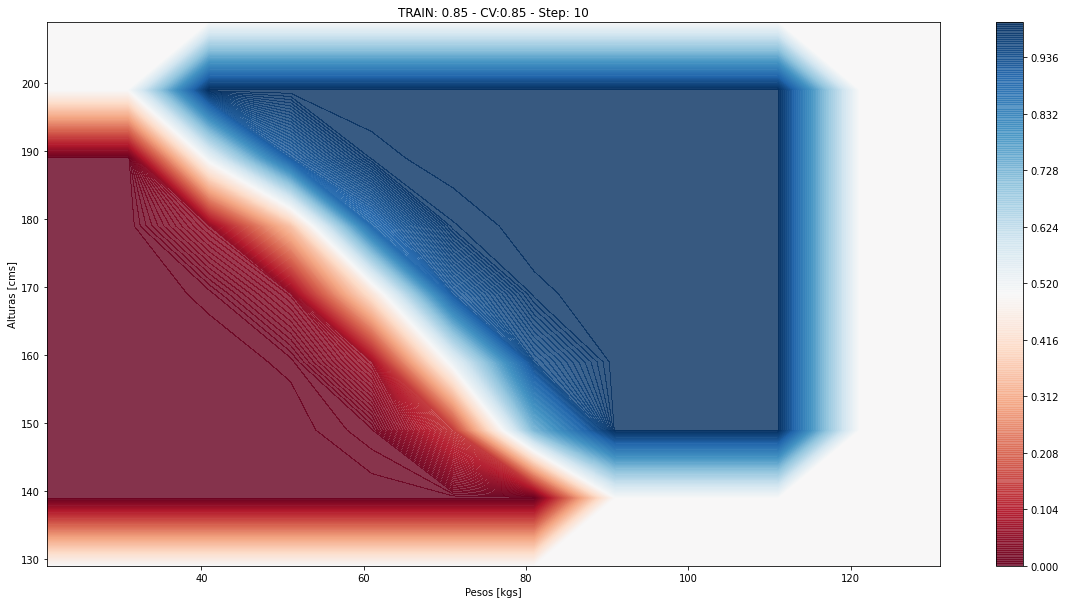

In [106]:

X, Y = np.meshgrid(joint_hombres.X, joint_hombres.Y)
Z = np.zeros(X.shape)
for i in range(X.shape[0]):
    Z[i] = get_class_prob_naive(X[i],
                                Y[i],
                               joint_hombres,
                               joint_mujeres,
                               likelihood_indep_class_1,
                                           likelihood_indep_class_2)[0]

%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = fig.gca()
cm = plt.cm.RdBu
cf = ax.contourf(X, Y, Z, 256, alpha=.8, vmin=0., vmax=1., cmap=cm)
plt.colorbar(cf, ax=ax)
ax.set_title('TRAIN: ' + str(np.round(acc_train_nbayes*100)/100) + ' - CV:' + str(np.round(acc_cv_nbayes*100)/100) +' - Step: '+str(step))
ax.set_xlabel('Pesos [kgs]')
ax.set_ylabel('Alturas [cms]')
plt.show()

In [107]:

train_acc = []
test_acc = []
steps = [2, 4,  8, 16, 32]
for step in steps:
    maxs = np.round(data[['Peso','Altura']].values.max(axis = 0))
    mins = np.round(data[['Peso','Altura']].values.min(axis = 0))

    joint_hombres = BiVariateJoint(data_hombres,
                                   step_X = step,
                                   step_Y = step,
                                   mins = mins,
                                   maxs = maxs
                                  )
    joint_mujeres = BiVariateJoint(data_mujeres,
                                   step_X = step,
                                   step_Y = step,
                                   mins = mins,
                                   maxs = maxs)

    likelihood_indep_class_1, likelihood_indep_class_2 = get_indep_likelihoods(joint_hombres, joint_mujeres)

    p_class_1, p_class_2 = get_class_prob_naive(data['Peso'].values,
                                            data['Altura'].values,
                                            joint_hombres,
                                            joint_mujeres,
                                           likelihood_indep_class_1,
                                           likelihood_indep_class_2)
    acc_train_nbayes = ((p_class_1>p_class_2) == (data['Genero'].values == 'Hombre')).sum()/len(data)

    train_acc.append(acc_train_nbayes)
    p_class_1, p_class_2 = get_class_prob_naive(test['Peso'].values,
                                            test['Altura'].values,
                                            joint_hombres,
                                            joint_mujeres,
                                           likelihood_indep_class_1,
                                           likelihood_indep_class_2
                                           )
    acc_cv_nbayes = ((p_class_1>p_class_2) == (test['Genero'].values == 'Hombre')).sum()/len(test)
    test_acc.append(acc_cv_nbayes)

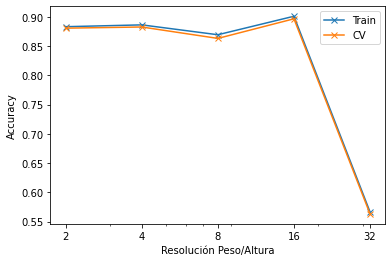

In [108]:
%matplotlib inline
plt.xscale('log')
plt.plot(steps, train_acc, label='Train', marker='x')
plt.plot(steps, test_acc, label='CV', marker='x')
plt.xticks(steps, steps)
plt.xlabel('Resolución Peso/Altura')
plt.ylabel('Accuracy')
plt.legend()
plt.show()